In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("StudentsPerformance.csv")

# **Dataset**
**gender:** gender of student 

**race/ethnicity:** race/ethnicity of a student which defined as groups

**parental level of education:** highest degree that parent of student obtained

**lunch:** if a student get enough or reduced lunch

**test preparation course:** student either did a test preparation for the exam or not

**math score:** exam score from mathematics

**reading score:** exam score from reading

**writing score:** exam score from writing

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


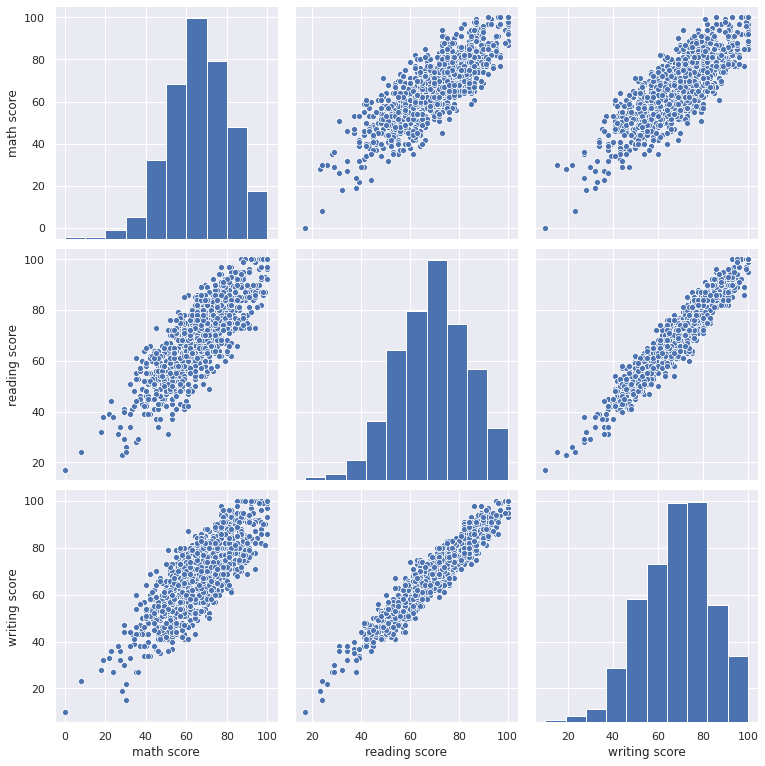

In [10]:
sns.set()
cols = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score']
sns.pairplot(df[cols], size = 3.5)
plt.show();

# **Data Preprocessing**


In [11]:
df.isnull().sum(axis=0)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.drop(columns = "race/ethnicity", axis = 1)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,99,95
996,male,high school,free/reduced,none,62,55,55
997,female,high school,free/reduced,completed,59,71,65
998,female,some college,standard,completed,68,78,77


In [0]:
#If the student has higher grade than the average of grades, student treated like he/she successfully passes the class 
df["math_results"] = np.where(df["math score"] > int(df["math score"].mean()), 'P', 'F')
df["reading_results"] = np.where(df["reading score"] > int(df["reading score"].mean()), 'P', 'F')
df["writing_results"] = np.where(df["writing score"] > int(df["writing score"].mean()), 'P', 'F')

In [0]:
def pie(category):
    """This function gets category name and builds a piechart with percentages of passed students in that category.

    Args:
       population: int. category names in csv file

    Returns:
       None
    """
    label = []
    label_percent = []
    
    for cat in df[category].unique():
        label.append(cat)
        pass_cat = df[(df[category] == cat) & ((df['math_results'] == 'P') | (df['reading_results'] == 'P') | (df['writing_results'] == 'P'))].shape[0]
        all_cat = df[df[category] == cat].shape[0]
        label_percent.append(pass_cat / all_cat * 100)
        
    figs, axs = plt.subplots()
    axs.pie(label_percent, labels = label, autopct = '%1.1f%%')
    plt.title(category)
    plt.show()

# **Q1: Does parental level of education affects student's exam score?**

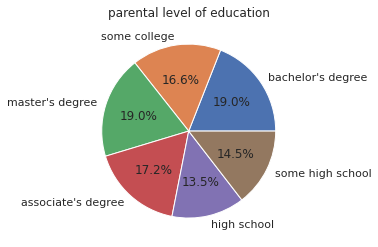

In [15]:
pie('parental level of education')

**Answer:** The highest educational degree that parents obtained has effect on student's exam scores.

# **Q2: Can having a better lunch results in higher exam scores?**

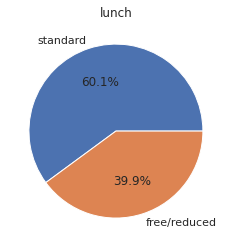

In [16]:
pie('lunch')

**Answer:** Having a standard luch instead of reduced lunch has positive effect on student's exam score

# **Q3: Is there any relation between test preparation course and student's exam scores?**

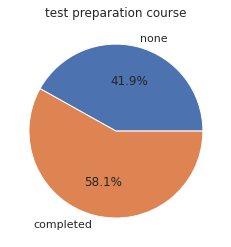

In [17]:
pie('test preparation course')

**Answer:** Completing test preparation test affect positively student's exam scores.